# EDA in Pandas

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"D:\Hitha\chemequip-analyzer\datasets\sample_equipment_data.csv")
df

,Equipment Name,Type,Flowrate,Pressure,Temperature
0,Pump-1,Pump,120,5.2,110
1,Compressor-1,Compressor,95,8.4,95
2,Valve-1,Valve,60,4.1,105
3,HeatExchanger-1,HeatExchanger,150,6.2,130
4,Pump-2,Pump,132,5.6,118
5,Valve-2,Valve,58,4.0,102
6,Reactor-1,Reactor,140,7.5,140
7,Pump-3,Pump,125,5.3,115
8,Condenser-1,Condenser,160,6.8,125
9,Compressor-2,Compressor,100,8.0,98


In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df

,Equipment Name,Type,Flowrate,Pressure,Temperature
0,Pump-1,Pump,120,5.20,110
1,Compressor-1,Compressor,95,8.40,95
2,Valve-1,Valve,60,4.10,105
3,HeatExchanger-1,HeatExchanger,150,6.20,130
4,Pump-2,Pump,132,5.60,118
5,Valve-2,Valve,58,4.00,102
6,Reactor-1,Reactor,140,7.50,140
7,Pump-3,Pump,125,5.30,115
8,Condenser-1,Condenser,160,6.80,125
9,Compressor-2,Compressor,100,8.00,98


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Equipment Name  15 non-null     object 
 1   Type            15 non-null     object 
 2   Flowrate        15 non-null     int64  
 3   Pressure        15 non-null     float64
 4   Temperature     15 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 732.0+ bytes


In [9]:
df.describe()

,Flowrate,Pressure,Temperature
count,15.00,15.00,15.00
mean,119.80,6.11,117.47
std,36.72,1.39,14.44
min,58.00,4.00,95.00
25%,97.50,5.25,106.00
50%,130.00,6.20,118.00
75%,147.50,7.05,129.00
max,165.00,8.40,140.00


In [ ]:
df.isnull().sum()
numeric_cols = ["Flowrate", "Pressure", "Temperature"]

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df = df.dropna(thresh=3)


In [11]:
df.nunique()

Equipment Name    15
Type               6
Flowrate          15
Pressure          15
Temperature       15
dtype: int64

In [20]:
df.sort_values(by="Temperature", ascending=False).head(5)
print("Min Temperature:", df["Temperature"].min())
print("Max Temperature:", df["Temperature"].max())
print("Max Temperature:", df["Temperature"].mean())



Min Temperature: 95
Max Temperature: 140
Max Temperature: 117.46666666666667


In [ ]:
high_temp_df = high_temp_df = df[df["Temperature"] >= 100]
high_temp_df = high_temp_df.sort_values(by="Temperature", ascending=False)
high_temp_df

,Equipment Name,Type,Flowrate,Pressure,Temperature
6,Reactor-1,Reactor,140,7.50,140
13,Reactor-2,Reactor,145,7.20,138
10,HeatExchanger-2,HeatExchanger,155,6.30,132
3,HeatExchanger-1,HeatExchanger,150,6.20,130
14,Condenser-2,Condenser,165,6.90,128
8,Condenser-1,Condenser,160,6.80,125
12,Pump-4,Pump,130,5.90,119
4,Pump-2,Pump,132,5.60,118
7,Pump-3,Pump,125,5.30,115
0,Pump-1,Pump,120,5.20,110


In [30]:
df_encoded = pd.get_dummies(df, columns=["Type"])

numeric_df = df_encoded.select_dtypes(include=["number", "bool"])

corr = numeric_df.corr()
print(corr)


                    Flowrate  Pressure  Temperature  Type_Compressor  \
Flowrate                1.00      0.54         0.79            -0.25   
Pressure                0.54      1.00         0.24             0.61   
Temperature             0.79      0.24         1.00            -0.59   
Type_Compressor        -0.25      0.61        -0.59             1.00   
Type_Condenser          0.47      0.22         0.25            -0.15   
Type_HeatExchanger      0.36      0.04         0.38            -0.15   
Type_Pump               0.12     -0.27        -0.09            -0.24   
Type_Reactor            0.25      0.36         0.61            -0.15   
Type_Valve             -0.84     -0.75        -0.46            -0.20   

                    Type_Condenser  Type_HeatExchanger  Type_Pump  \
Flowrate                      0.47                0.36       0.12   
Pressure                      0.22                0.04      -0.27   
Temperature                   0.25                0.38      -0.09   
Typ

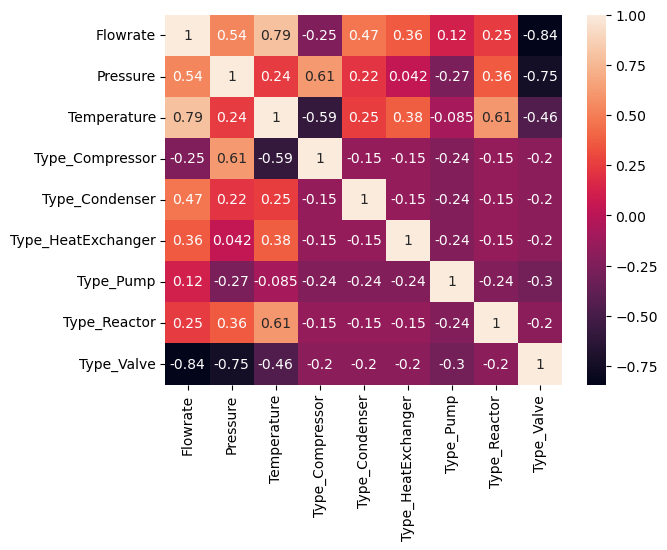

In [31]:
sns.heatmap(numeric_df.corr(), annot = True)

plt.rcParams['figure.figsize'] = (20,7)

plt.show()

In [36]:
type_avgs = df.groupby('Type', as_index=False)[
    ["Flowrate", "Pressure", "Temperature"]
].mean().sort_values(by="Pressure", ascending=False)
type_avgs.reset_index()


,index,Type,Flowrate,Pressure,Temperature
0,0,Compressor,97.50,8.20,96.50
1,4,Reactor,142.50,7.35,139.00
2,1,Condenser,162.50,6.85,126.50
3,2,HeatExchanger,152.50,6.25,131.00
4,3,Pump,126.75,5.50,115.50
5,5,Valve,60.00,4.10,104.67


In [37]:
df.columns

Index(['Equipment Name', 'Type', 'Flowrate', 'Pressure', 'Temperature'], dtype='object')

In [38]:
type_avgs.transpose()
type_avgs

,Type,Flowrate,Pressure,Temperature
0,Compressor,97.50,8.20,96.50
4,Reactor,142.50,7.35,139.00
1,Condenser,162.50,6.85,126.50
2,HeatExchanger,152.50,6.25,131.00
3,Pump,126.75,5.50,115.50
5,Valve,60.00,4.10,104.67


<Axes: >

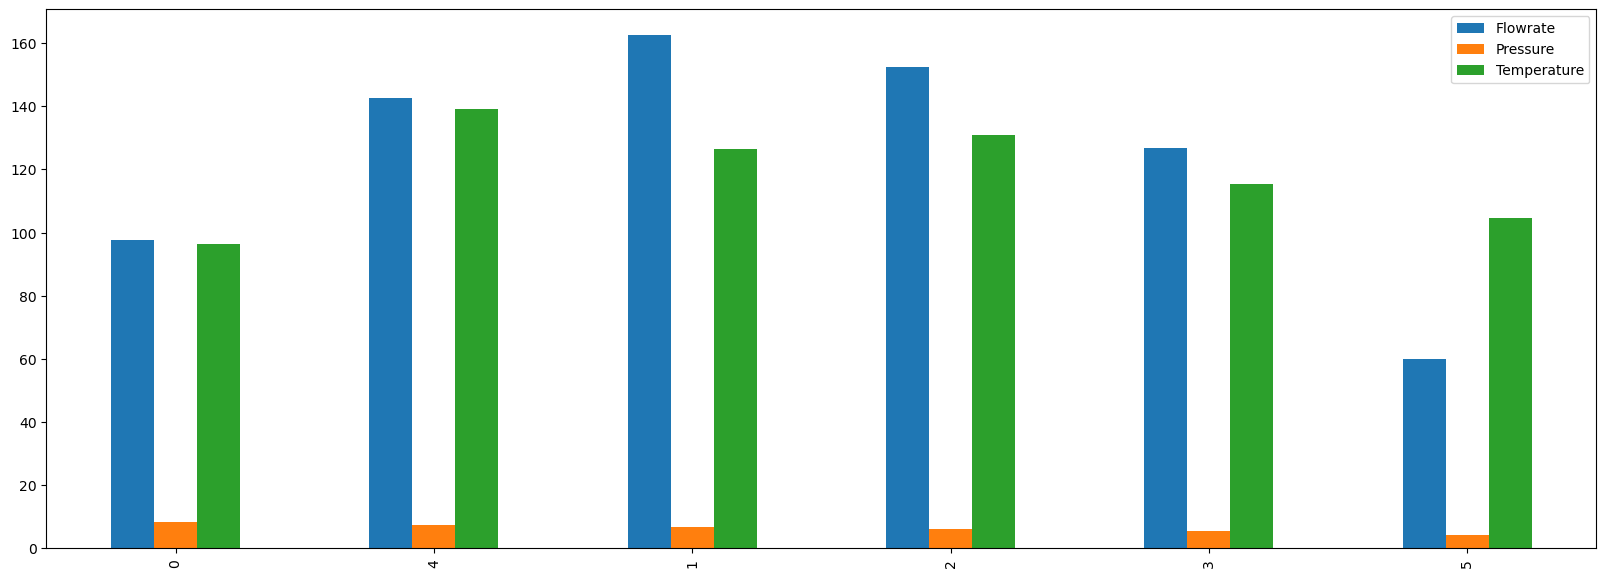

In [40]:
type_avgs.plot(kind = "bar")

In [ ]:
type_avgs.plot(kind = "")

<Axes: >

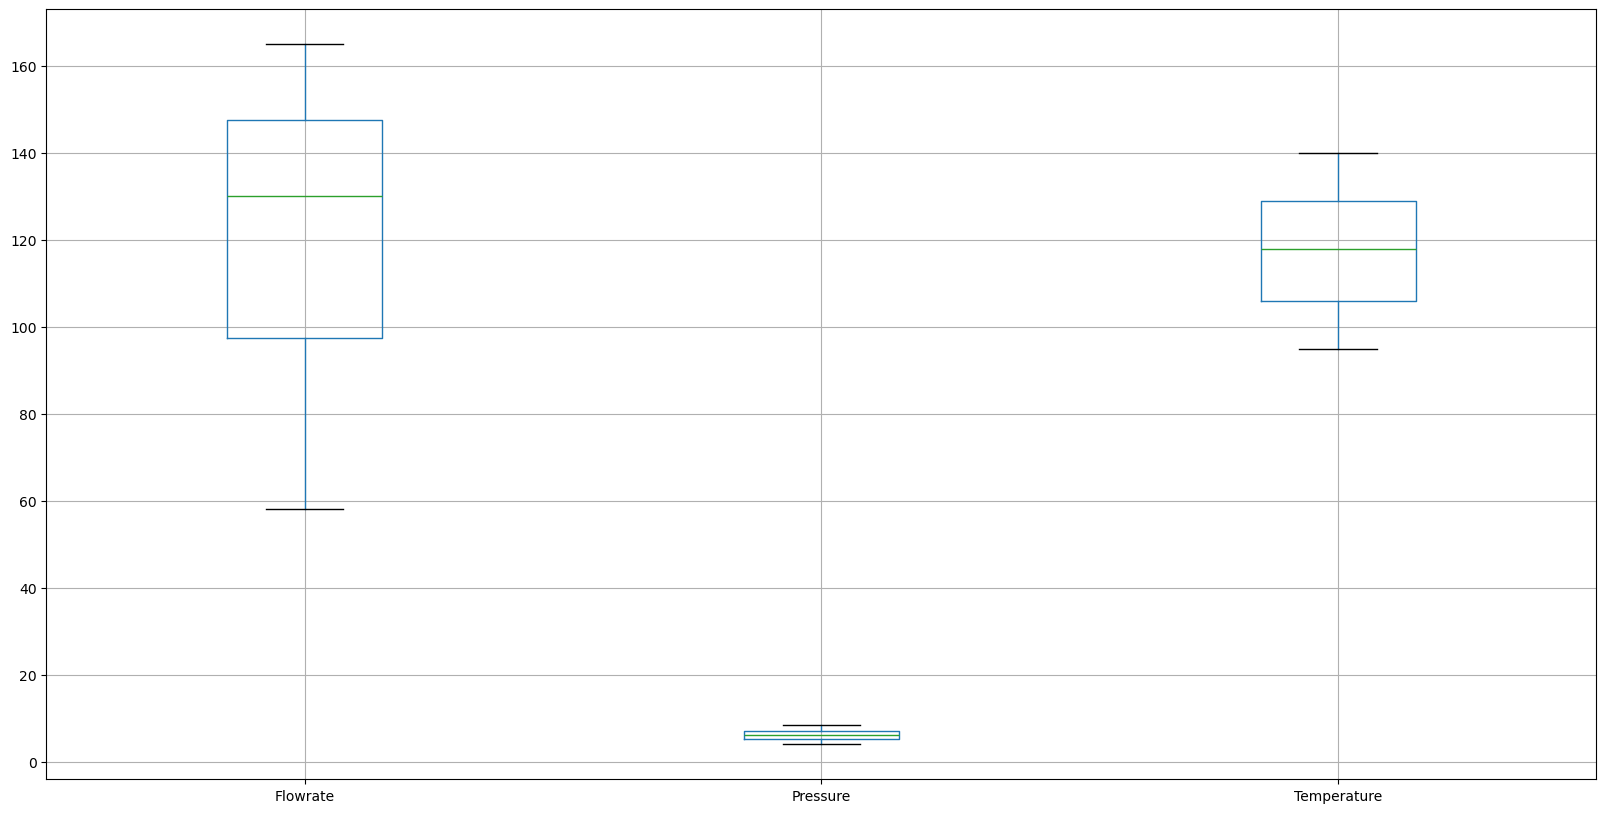

In [41]:
df.boxplot(figsize=(20,10))